In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
## import libraries

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Evaluation
from sklearn.metrics import accuracy_score

## Interface: https://blog.konghy.cn/2017/12/16/python-warnings/
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
## import datasets
train = pd.read_csv('./data/DS_train.csv', header=None)
test = pd.read_csv('./data/DS_test.csv', header=None)
train_label = pd.read_csv('./data/DS_trainLabels.csv', header=None)

In [4]:
print(train.shape)
print(test.shape)
print(train_label.shape)
train.head()

(1000, 40)
(9000, 40)
(1000, 1)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [5]:
## 統計資訊
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [8]:
## np.ravel: https://blog.csdn.net/tymatlab/article/details/79009618 
#  將DataFrame shape:(1000,1) 轉成numpy一維陣列 1D-array 即 shape=(1000,)
X, y = train, np.ravel(train_label)
print(y.shape)

(1000,)


In [11]:
## 拆成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print(X_train.shape)
print(y_train.shape)

(750, 40)
(750,)


## KNN

In [29]:
algorithm = ['auto', 'ball_tree', 'brute']
weights = ['uniform', 'distance']
neig = range(1, 40)
train_accuracy = []
test_accuracy = []
best_score = 0.0
best_knn = None

39
39
Train Score:  0.92
Test Score:  0.916
KNeighborsClassifier(n_neighbors=14)


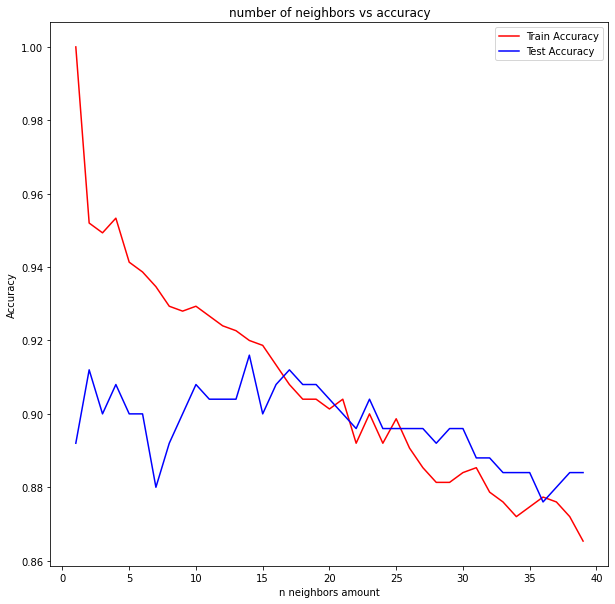

In [30]:
for k in neig:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'auto', weights = 'uniform')
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    train_score = KNN.score(X_train, y_train)
    test_score = accuracy_score(y_test, y_pred)
    
    train_accuracy.append(train_score)
    test_accuracy.append(test_score)
        
    ## 找出最佳的準確度
    if test_score > best_score:
        best_score = test_score
        best_knn = KNN

print(len(train_accuracy)) 
print(len(test_accuracy))

## 視覺化: 了解設定什麼k值有最佳的準確度
plt.figure(figsize = (10, 10))
plt.plot(neig, train_accuracy, c = 'red', label = 'Train Accuracy')
plt.plot(neig, test_accuracy, c = 'blue', label = 'Test Accuracy')
plt.title('number of neighbors vs accuracy')
plt.xlabel('n neighbors amount')
plt.ylabel('Accuracy')
plt.legend()

print('Train Score: ', best_knn.score(X_train, y_train))
print('Test Score: ', best_score)
print(best_knn)    

## Random Forest

In [31]:
clf = RandomForestClassifier(random_state = 10)
n_estimators = [20, 30, 60, 90, 120, 140]
max_depth = [1, 7, 10, 20, 40]
split = [5, 10, 17, 20]

param = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = split)

grid_search = GridSearchCV(estimator = clf, param_grid = param, cv = 5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(X_train, y_train)

y_pred = grid_result.predict(X_test)
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Accuracy: 0.858667 using {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 120}


In [32]:
print('Train Score: ', grid_result.score(X_train, y_train))
print('Test Score: ', accuracy_score(y_pred, y_test))

Train Score:  0.9986666666666667
Test Score:  0.856


## SVC Model

In [33]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
SVCModel = SVC(kernel = 'rbf', max_iter = 1000, C = 0.1)
SVCModel.fit(X_train, y_train)
y_pred = SVCModel.predict(X_test)
print('Train Score: ', SVCModel.score(X_train, y_train))
print('Test Score: ', accuracy_score(y_pred, y_test))


Train Score:  0.856
Test Score:  0.864


In [34]:
y_pred.shape

(250,)

## Gaussian Mixture Model
https://ithelp.ithome.com.tw/articles/10195700
https://ithelp.ithome.com.tw/articles/10206244

In [35]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

pca = PCA(0.95,whiten=True)
train_pc = pca.fit_transform(train)
test_pc = pca.transform(test)
print(train_pc.shape)
print(test_pc.shape)

(1000, 29)
(9000, 29)


C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  f"KMeans is known to have a memory leak on Windows "
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  f"KMeans is known to have a memory leak on Windows "


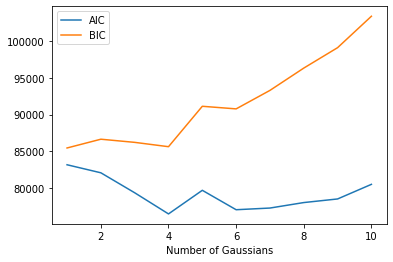

In [36]:
# Let's fit GMM with various number of components
n_components = np.arange(1,11)
models = [GaussianMixture(n, covariance_type='full', random_state=100) 
          for n in n_components]
aics = [model.fit(train_pc).aic(train_pc) for model in models]
bics = [model.fit(train_pc).bic(train_pc) for model in models]

plt.plot(n_components, aics, label='AIC')
plt.plot(n_components, bics, label='BIC')
plt.xlabel('Number of Gaussians')
plt.legend()
plt.show()

In [43]:
best_gmm = GaussianMixture(n_components=4, covariance_type='full').fit(train_pc)

# Let's apply the model to get probabilities
train_gmm = best_gmm.predict_proba(train_pc)
test_gmm = best_gmm.predict_proba(test_pc)
print(train_gmm.shape)
print(test_gmm.shape)

# Split the new data into train and validadtion set
X_train_gmm, X_val_gmm, y_train_gmm, y_val_gmm = train_test_split(train_gmm, train_label, random_state=42, test_size=0.2)
print(X_train_gmm.shape)
print(y_train_gmm.shape)

(1000, 4)
(9000, 4)
(800, 4)
(800, 1)


In [38]:
# print('X shape: ', X.shape)
# print('\n')

# lowest_bic = np.infty
# bic = []

# cv_types = ['tied', 'full', 'diag', 'spherical']

# for ct in cv_types:
#     for n_components in range(1, 8):
#         gmm = GaussianMixture(n_components = n_components,covariance_type = ct)
#         gmm.fit(X)
#         bic.append(gmm.aic(X))
#         if bic[-1] < lowest_bic:
#             lowest_bic = bic[-1]
#             best_gmm = gmm
# best_gmm.fit(X)
# gmm_train = best_gmm.predict_proba(X_train)
# gmm_val = best_gmm.predict_proba(X_test)
# gmm_test = best_gmm.predict_proba(test)
# print(gmm.aic(X))

In [39]:
# print("gmm test: ", gmm_val.shape)
# print("gmm_train: ", gmm_train.shape)
# print("X train: ", X_train.shape)
# print('X test: ', X_test.shape)

## 將Gaussian Mixture Model重新將數據集聚類的結果，再應用回KNN、RandomForest、SVC

In [46]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
SVCModel = SVC(kernel = 'rbf', max_iter = 1000, C = 0.1)
SVCModel.fit(X_train_gmm, np.ravel(y_train_gmm))
y_pred = SVCModel.predict(X_val_gmm)
print('Train Score: ', SVCModel.score(X_train_gmm, y_train_gmm))
print('Test Score: ', accuracy_score(y_pred, y_val_gmm))


Train Score:  0.995
Test Score:  0.99


In [53]:
SVCModel = SVC(kernel = 'rbf', max_iter = 1000, C = 0.1)
SVCModel.fit(train_gmm, np.ravel(train_label))
y_pred = SVCModel.predict(test_gmm)
print(y_pred.shape)
submission = {'Id': np.arange(1, y_pred.shape[0]+1),
             'Solution': y_pred}
submission = pd.DataFrame(submission)
submission.to_csv('svc_submission.csv', index=False)

(9000,)


## KNN

Train Score:  0.995
Test Score:  0.99
KNeighborsClassifier(n_neighbors=3)


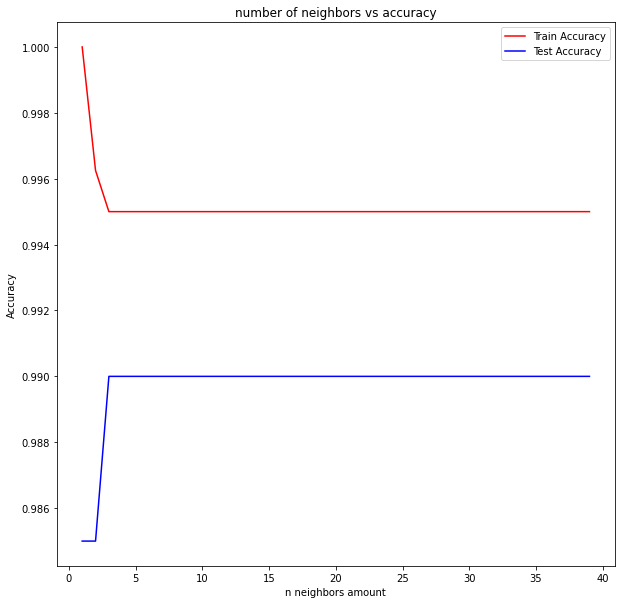

In [59]:
algorithm = ['auto', 'ball_tree', 'brute']
weights = ['uniform', 'distance']
neig = range(1, 40)
train_accuracy = []
test_accuracy = []
best_score = 0.0
best_knn = None

for k in neig:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'auto', weights = 'uniform')
    KNN.fit(X_train_gmm, np.ravel(y_train_gmm))
    y_pred = KNN.predict(X_val_gmm)
    train_score = KNN.score(X_train_gmm, y_train_gmm)
    val_score = accuracy_score(y_pred, y_val_gmm)
    
    train_accuracy.append(train_score)
    test_accuracy.append(val_score)
    
    ## 找出最佳的準確度
    if val_score > best_score:
        best_score = val_score
        best_knn = KNN
    
## 視覺化: 了解設定什麼k值有最佳的準確度
plt.figure(figsize = (10, 10))
plt.plot(neig, train_accuracy, c = 'red', label = 'Train Accuracy')
plt.plot(neig, test_accuracy, c = 'blue', label = 'Test Accuracy')
plt.title('number of neighbors vs accuracy')
plt.xlabel('n neighbors amount')
plt.ylabel('Accuracy')
plt.legend()

print('Train Score: ', best_knn.score(X_train_gmm, y_train_gmm))
print('Test Score: ', best_score)
print(best_knn)   

In [60]:
best_knn.fit(train_gmm, np.ravel(train_label))
ypred = best_knn.predict(test_gmm)
submission = {'Id': np.arange(1, ypred.shape[0]+1),
             'Solution': ypred}
submission = pd.DataFrame(submission)
submission.to_csv('knn_submission.csv', index=False)

## RandomForest

In [62]:
clf = RandomForestClassifier(random_state = 10)
n_estimators = [20, 30, 60, 90, 120, 140]
max_depth = [1, 7, 10, 20, 40]
split = [5, 10, 17, 20]

param = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = split)

grid_search = GridSearchCV(estimator = clf, param_grid = param, cv = 5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(X_train_gmm, np.ravel(y_train_gmm))


print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_result.predict(X_val_gmm)
print('Train Score: ', grid_result.score(X_train_gmm, y_train_gmm))
print('Test Score: ', accuracy_score(y_pred, y_val_gmm))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Accuracy: 0.995000 using {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 20}
Train Score:  0.9975
Test Score:  0.985


In [64]:
grid_search = GridSearchCV(estimator = clf, param_grid = param, cv = 5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(train_gmm, np.ravel(train_label))
y_pred = grid_result.predict(test_gmm)
submission = {'Id': np.arange(1, y_pred.shape[0]+1),
             'Solution': y_pred}
submission = pd.DataFrame(submission)
submission.to_csv('randomforest_submission.csv', index=False)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
